0.7122688287762831
0.2877311712237166


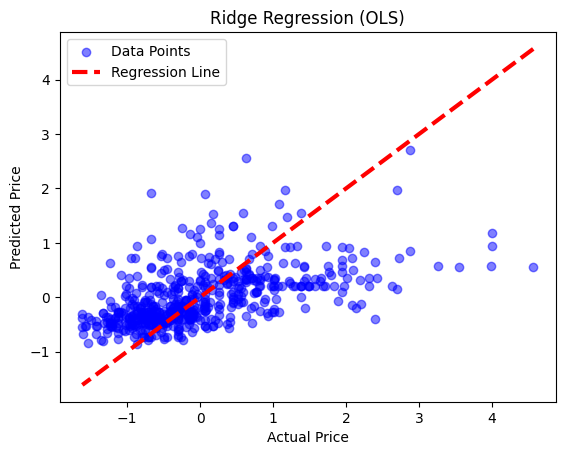

In [11]:
# Ridge regression using GD 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
csv_data=pd.read_csv('Housing.csv')
# print(csv_data)
x_pn = np.array(
    csv_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv_data['price'])
# Normalizing the data using z^2 normalization
x = (x_pn-np.mean(x_pn))/np.std(x_pn)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

# print(x)
# print(y)
# gradient descent algorithm
def gradient_descent_algorithm(x,y,learning_rate,n_iteration):
    # n
    n=len(y)
    xT = np.transpose(x)
    xTx = np.dot(xT, x)
    L = 0.7
    xTx_shape = np.shape(xTx)
    I = np.identity(xTx_shape[0])
    LI = np.dot(L, I)
    # parameter 1
    # (xTx+LI)^-1
    # let parameter_1=(xTx+LI)^-1
    parameter_1 = np.linalg.inv((xTx+LI))
    # parameter 2
    xTy = np.dot(xT, y)
    beta_cofficient = np.dot(parameter_1, xTy)
    # iterating over
    for _ in range(n_iteration):
        y_predicted=np.dot(x,beta_cofficient)
        cost_function=(y_predicted-y)
        # (1/n)*xT.cost_function
        parameter_1=(1/n)*np.dot(xT,cost_function)
        # (lambda/n)*beta_cofficient
        lam_div_n=L/n
        parameter_2=np.dot(lam_div_n,beta_cofficient)
        # gradient 
        dm=parameter_1+parameter_2
        # upgrading gradient
        dm-=learning_rate*dm
    return beta_cofficient

updated_beta_cofficient=gradient_descent_algorithm(x,y,0.001,1000)
# print(updated_beta_cofficient)
y_predicted=np.dot(x,updated_beta_cofficient)
# print(y_predicted)

# model evaluation
mse = mean_squared_error(y,y_predicted)
print(mse)
r2 = r2_score(y,y_predicted)
print(r2)

# plotting
plt.scatter(y, y_predicted, color='blue', alpha=0.5, label='Data Points')
plt.plot(y, y, 'r--', lw=3, label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Ridge Regression (OLS)')
plt.show()